# Leads Scoring Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals.X Education wants to increase their lead conversion rate by identifying the most potential leads. They are looking to build a model that assigns a lead score to each lead, indicating their likelihood of converting into paying customers. The target lead conversion rate is around 80%.


## Goals of the Case Study

1. The main goal is to build a logistic regression model that assigns a lead score to each lead, indicating their likelihood of converting into paying customers. This will help the company target potential leads more effectively, with higher scores indicating hotter leads and higher chances of conversion.



2. The model should be flexible enough to handle future changes in the company's requirements and adjust accordingly. This includes addressing additional problems identified by the company and incorporating them into the logistic regression model. The solutions for these problems should be included in the final presentation, along with recommendations based on the model's findings.

### Step 1 : Importing Libraries and Data



In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Suppresssing warnings
import warnings
warnings.filterwarnings('ignore')

# Ignore future warnings
warnings.simplefilter('ignore', FutureWarning)

pd.set_option("display.max_rows", 500)
pd.set_option('display.max_colwidth', 1500)
pd.set_option('display.max_columns', None)

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data modelling
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Libraries for statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Libraries for sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve


In [2]:
#importing dataset to csv

leads_df=pd.read_csv('Leads.csv')


### Step 2: Inspecting the Dataframe

In [3]:
#Checking the head of dataset
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Checking the dimesions of the dataset
leads_df.shape

(9240, 37)

In [5]:
#Describing the dataset
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Checking the info of each column in the dataset
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Here,In order to build the logistic regression model, we need to handle categorical values by creating dummy variables and address the presence of null values by applying appropriate treatment methods. These steps are crucial for accurate analysis and reliable results.

In [7]:
#checking for duplicates in the dataset
sum(leads_df.duplicated(subset = 'Prospect ID')) == 0

True

In [8]:
#checking for duplicates in the dataset
sum(leads_df.duplicated(subset = 'Lead Number')) == 0

True

#### Here we can see that 'Prospect ID' and 'Lead Number' do not have any duplicate value

# Exploratory Data Analysis

### Step 3: Data Cleaning 

<b><font color= Blue size =4>3.1 Identifying Missing Values</font></b>

In [9]:
#Dropping the 'Prospect ID' and 'Lead Number' as they have unique values

leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [10]:
#Replace 'Select' values with Nan
leads_df=leads_df.replace("Select", np.nan)

In [11]:
#Checking count of missing values
leads_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

<b><font color= Blue size =3>3.2 Dropping Columns with Missing Values >=45%</font></b>

In [12]:
#Dropping all the columns with more than 45% missing values
cols=leads_df.columns

for i in cols:
    if((100*(leads_df[i].isnull().sum()/len(leads_df.index))) >= 35):
        leads_df.drop(i, 1, inplace = True)

In [13]:
#checking percentage of null values after dropping the column

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

<b><font color= Blue size =3>3.3 Categorical Attributes Analysis: </font></b>


<b><font color= Black size =3>Imbalanced Variables</font></b>

In [14]:
#create list of columns to be dropped

cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

In [15]:
#checking value counts 

leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### Here in this case 'Google' is having highest number of occurences, hence we will impute the missing values with label 'Google'

In [16]:
#Replace Nan Value with Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Google')

#Lead Source has Google and google. Change it to Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')


In [17]:
#Lets Combine low frequency values to Others

leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

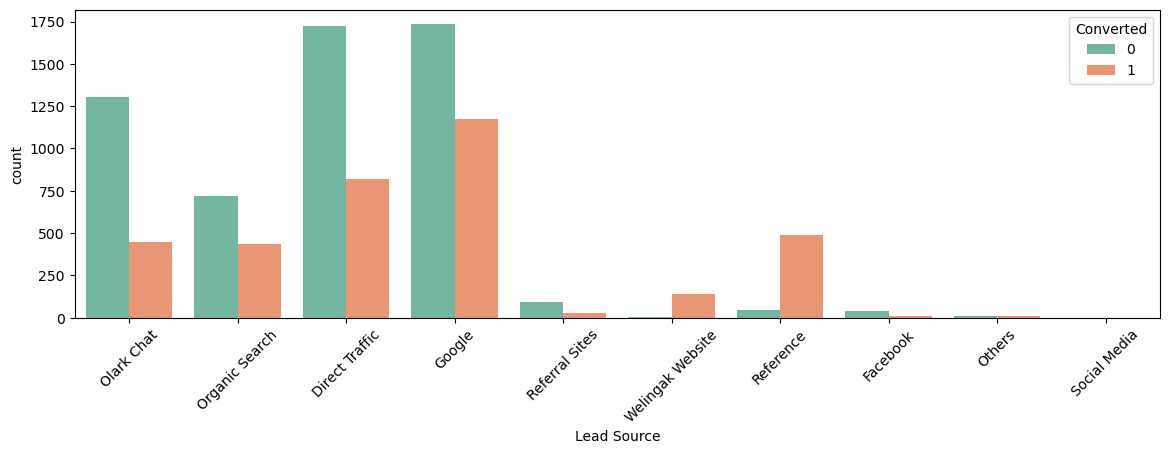

In [18]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(14,4))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

#### Observation:

1)Maximum Leads are generated by Google and Direct Traffic.

2)Conversion rate of Reference leads and Welinkgak Website leads is very high.

In [19]:
#checking the value counts of Country column

leads_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

#### Due to the high number of missing values, we can impute all the missing values with the value 'not provided' to ensure completeness and consistency in the dataset.

In [20]:
#Imputing missing values in Country column with "'not provided"
leads_df['Country'] = leads_df['Country'].replace(np.nan,'not provided')

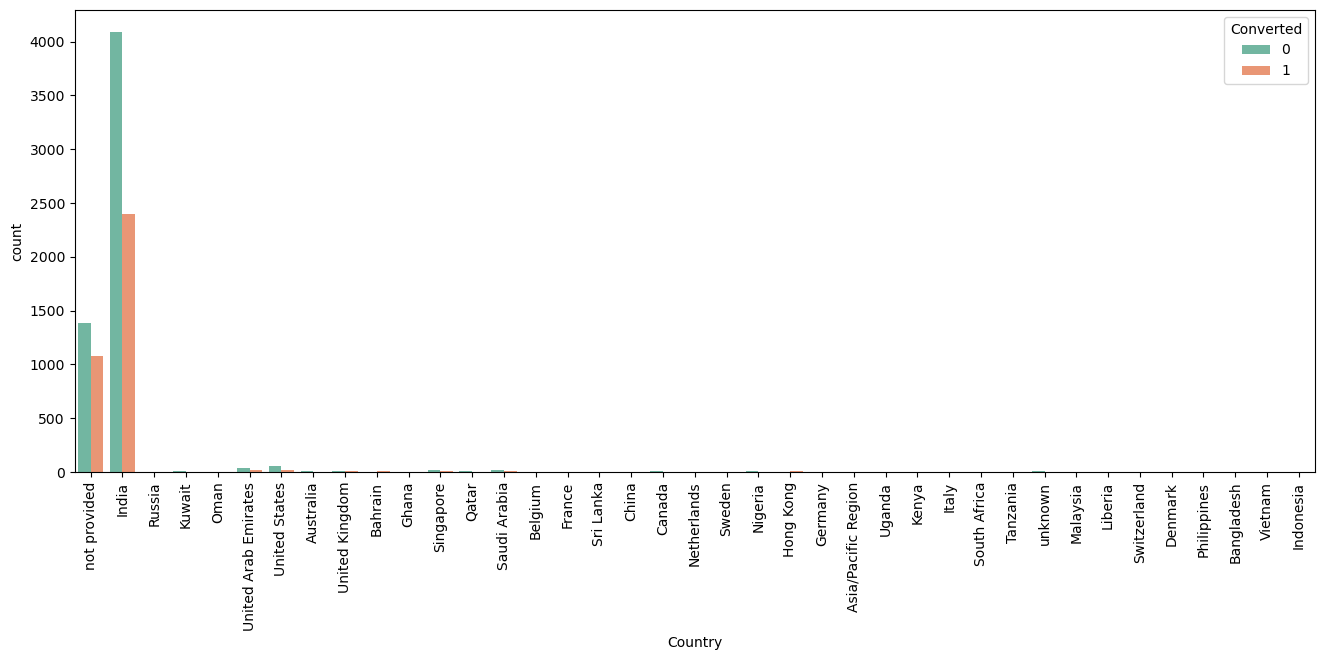

In [21]:
# Visualizing Country variable 
plt.figure(figsize=(16,6))
s1=sns.countplot(x= 'Country', hue='Converted' , data =leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [22]:
#creating a list of columns to be droppped

cols_to_drop.append('Country')

#checking out list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

In [23]:
#checking value counts of 'What is your current occupation' column
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

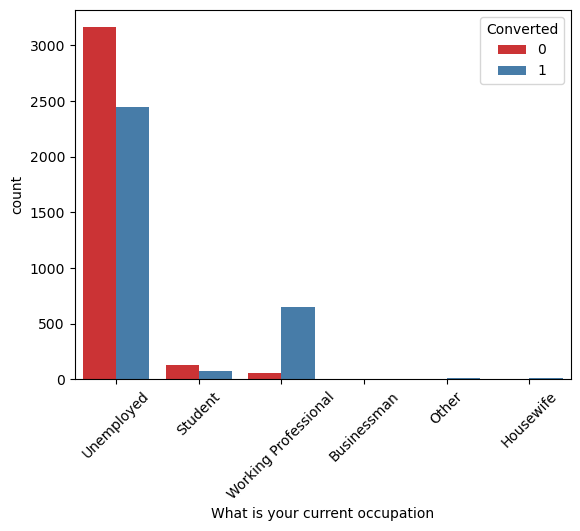

In [24]:
#visualize the count of Variable based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = leads_df , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()


#### Observation:

1)Maximum leads generated are unemployed and their conversion rate is more than 50%.


2)Conversion rate of working professionals is very high.

In [25]:
#checking value counts of 'What matters most to you in choosing a course'

leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [26]:
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

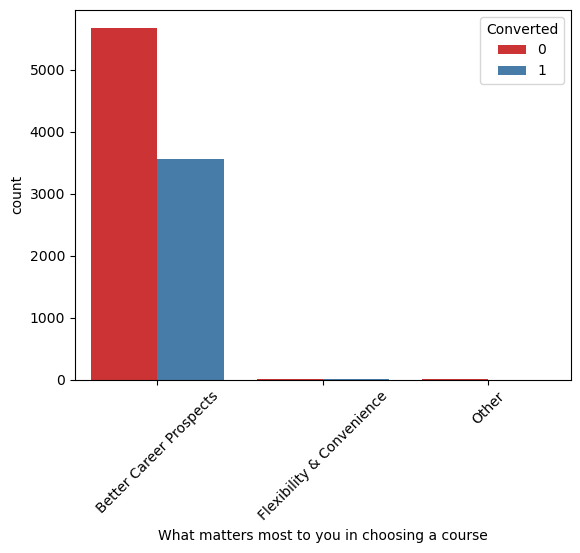

In [27]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = leads_df , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

In [28]:
# Append 'What matters most to you in choosing a course'to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

In [29]:
#checking value counts of Last Activity
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### To handle missing values effectively, we can impute them with the mode value "Email Opened", which represents the most frequently occurring value in the dataset.


In [30]:
  #replacing Nan Values with mode value "Email Opened"

leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Email Opened')


In [31]:
#combining low frequency values
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

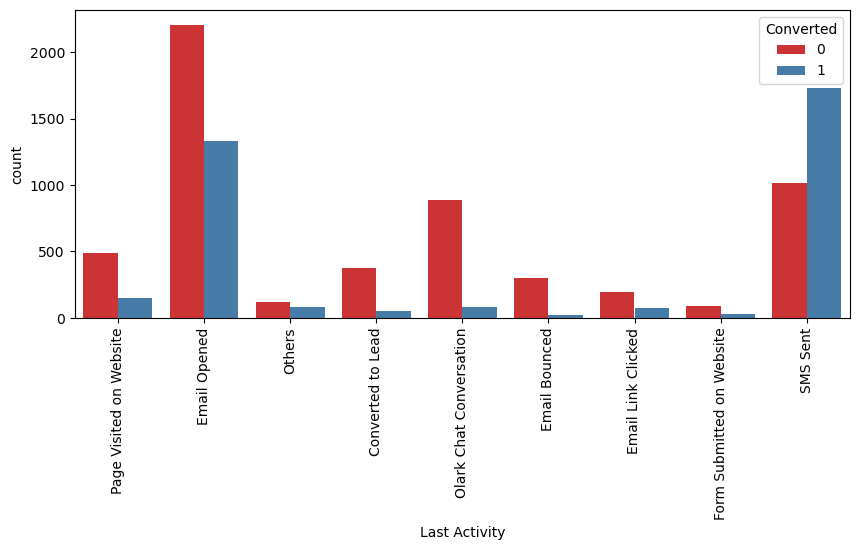

In [32]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(10,4))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = leads_df , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Observation:

1)Maximum leads are generated having last activity as Email opened but conversion rate is not too good.

2)SMS sent as last acitivity has high conversion rate.


In [33]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
cols_to_drop.append('Last Activity')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [34]:
#Checking the Null Values in All Columns after imputation:

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [35]:
#Missing values percentage is less than 2%, so we can drop those rows without affecting the data

leads_df = leads_df.dropna()

In [36]:
leads_df.shape

(6420, 25)

In [37]:
#Checkingt the percentage of Null Values in All Columns:

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

<b><font color= black size =3>Lead Origin</font></b>

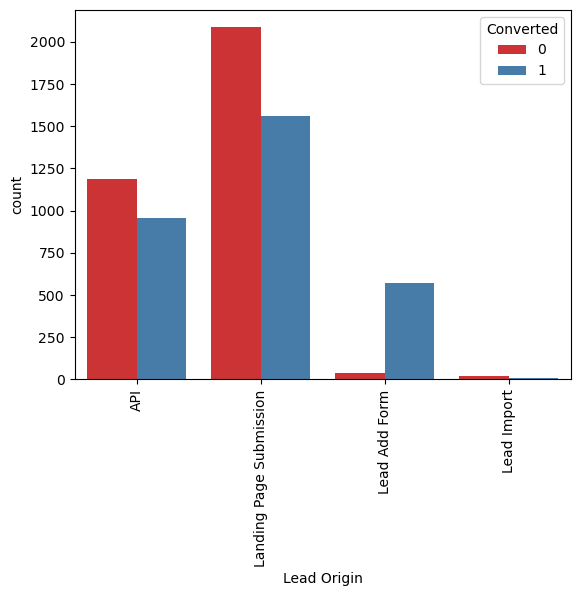

In [38]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = leads_df , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<b><font color= black size =3>Do Not Email & Do Not Call</font></b>

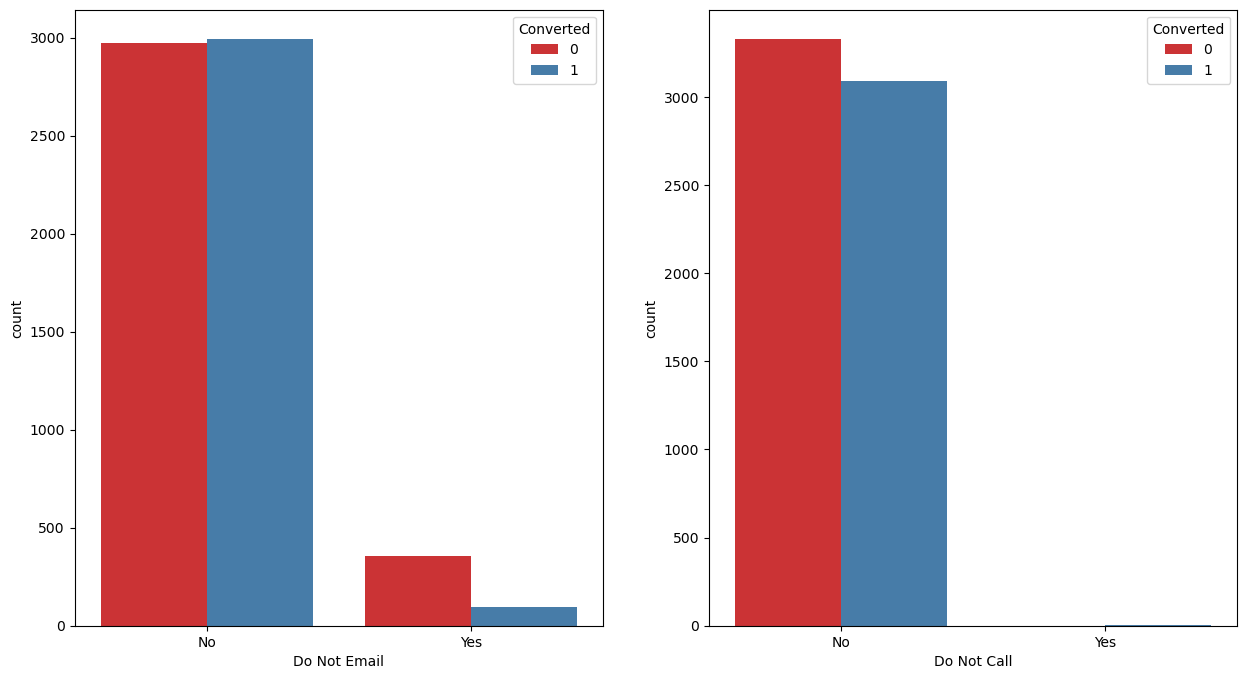

In [39]:
fig, axs = plt.subplots(1,2,figsize = (15,8))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_df, ax = axs[0],palette = 'Set1')
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df, ax = axs[1],palette = 'Set1')
plt.show()

#### To address the issue of highly skewed data, we can append the "Do Not Call" column to the list of columns to be dropped, which will help to improve the overall data distribution.

In [40]:
# Append 'Do Not Call' to the cols_to_drop List
cols_to_drop.append('Do Not Call')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call']

<b><font color= black size =3>Last Notable Activity</font></b>

In [41]:
#checking value counts of last Notable Activity

leads_df['Last Notable Activity'].value_counts()

Email Opened                    2042
Modified                        1966
SMS Sent                        1889
Page Visited on Website          214
Email Link Clicked               110
Olark Chat Conversation           76
Email Bounced                     50
Unsubscribed                      33
Unreachable                       22
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [42]:
#clubbing the lower frequency values

leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

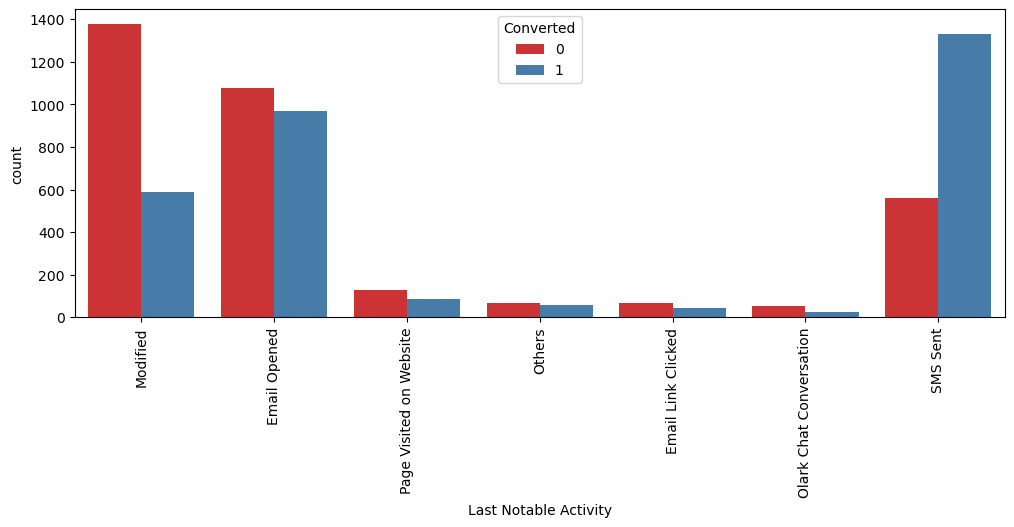

In [43]:
#visualizing the count of Variable based on Converted value

plt.figure(figsize = (12,4))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df , palette = 'Set1')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

#### Observation:

1)Maximum leads are generated having last activity as Email opened but conversion rate is not too good.

2)SMS sent as last acitivity has high conversion rate.

In [44]:
# Append the 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data

cols_to_drop.append('Last Notable Activity')

In [45]:
# checking the final list of columns to be dropped

cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity']

In [46]:
#drop the columns

leads = leads_df.drop(cols_to_drop,1)

In [47]:
#check info of dataset for remaining columns

leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6420 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      6420 non-null   object 
 1   Lead Source                      6420 non-null   object 
 2   Do Not Email                     6420 non-null   object 
 3   Converted                        6420 non-null   int64  
 4   TotalVisits                      6420 non-null   float64
 5   Total Time Spent on Website      6420 non-null   int64  
 6   Page Views Per Visit             6420 non-null   float64
 7   What is your current occupation  6420 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 451.4+ KB


In [48]:
#checking the dataset again after dropping the columns

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


### 3.4 Numerical Attributes Analysis

In [49]:
# Finding out conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

48.14641744548286

#### The current lead conversion rate stands at 48.15%, indicating the percentage of leads that successfully converted.


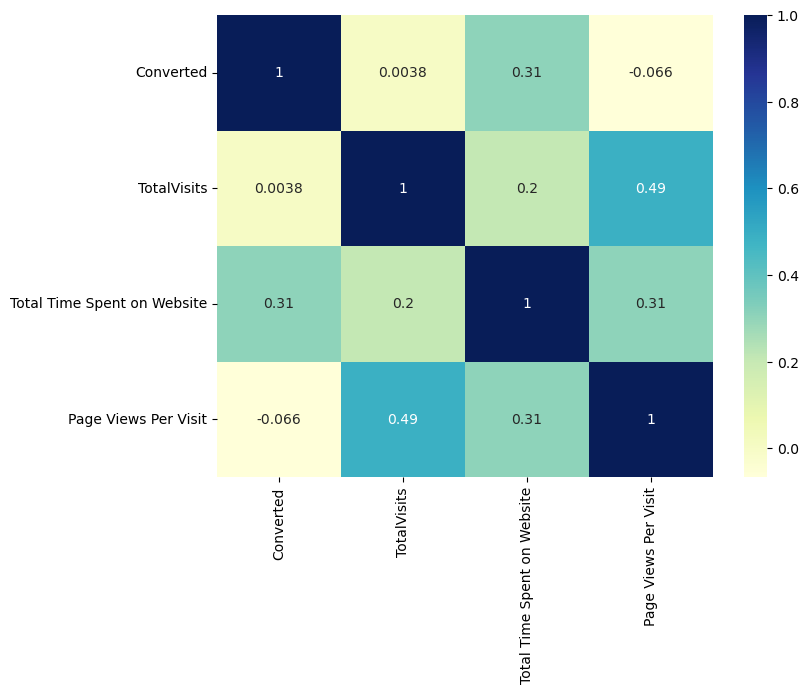

In [50]:
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(8,6))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

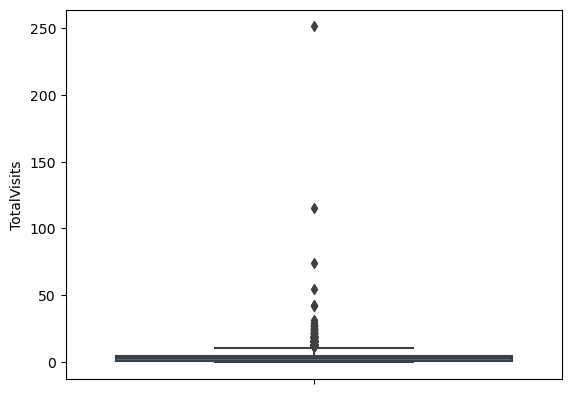

In [51]:
#visualizing spread of variable Total Visits

sns.boxplot(y=leads['TotalVisits'])
plt.show()

#### Observation:

The presence of outliers is clearly evident in the data.

In [52]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6420.000000
mean        3.604050
std         5.037196
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.100000
95%        10.000000
99%        17.810000
max       251.000000
Name: TotalVisits, dtype: float64

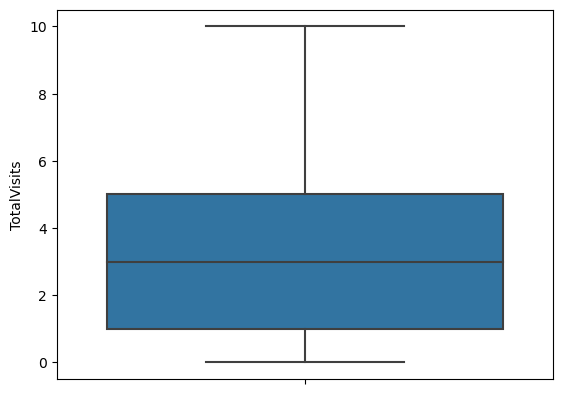

In [53]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

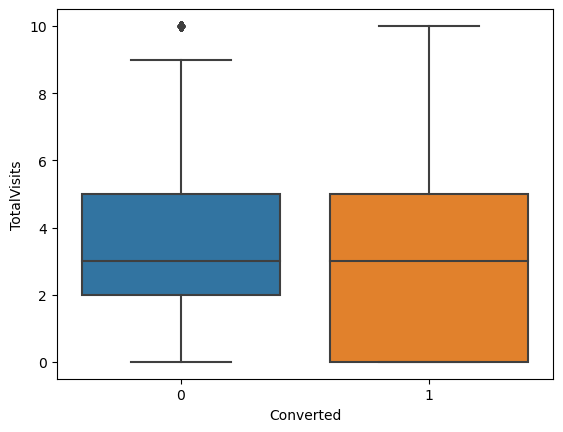

In [54]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

#### Observation:

The variable "TotalVisits" does not provide conclusive evidence as the median for both converted and non-converted leads is the same.

In [55]:
# Describing the leads in 'Page views per visit'

leads['Page Views Per Visit'].describe()

count    6420.000000
mean        2.466978
std         2.166570
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        55.000000
Name: Page Views Per Visit, dtype: float64

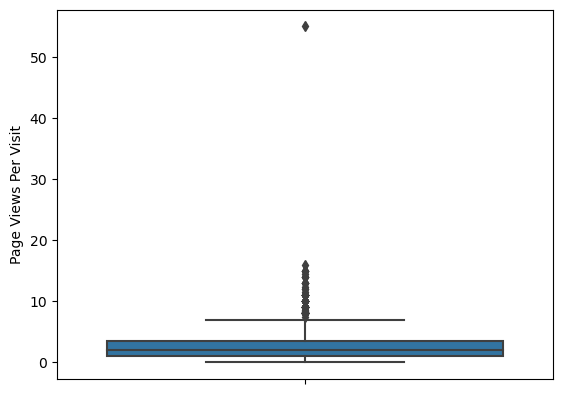

In [56]:
#visualizing spread of variable 'Page Views Per Visit'

sns.boxplot(y =leads['Page Views Per Visit'])
plt.show()

#### Obserevation:

Due to the clear presence of outliers in the above boxplot, it is necessary to perform outlier treatment for the variable in question.

In [57]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]


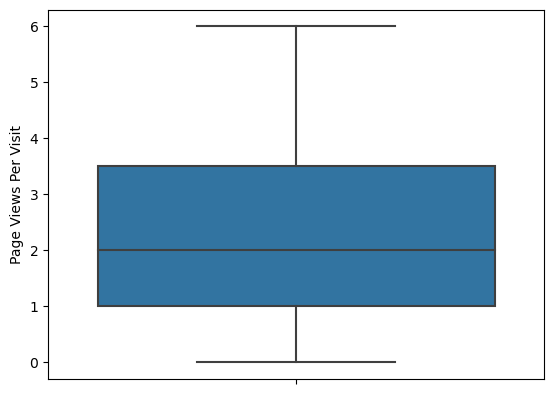

In [58]:
#visualizing variable after outlier treatment

sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

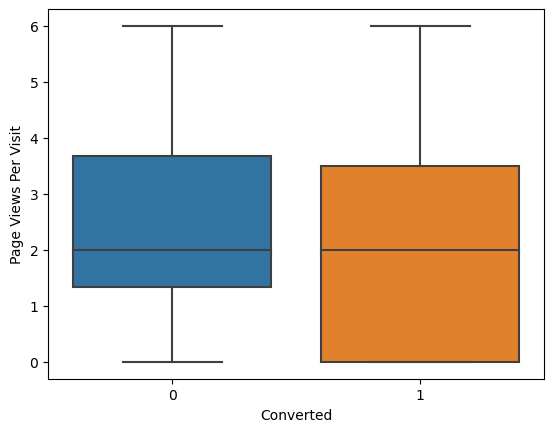

In [59]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

#### Observation:

1) The median for both converted and non-converted leads is nearly identical, suggesting that there is no significant difference in conversion rates based on this variable.

2) Based on the number of page views per visit, no conclusive findings can be drawn regarding its impact on lead conversion.


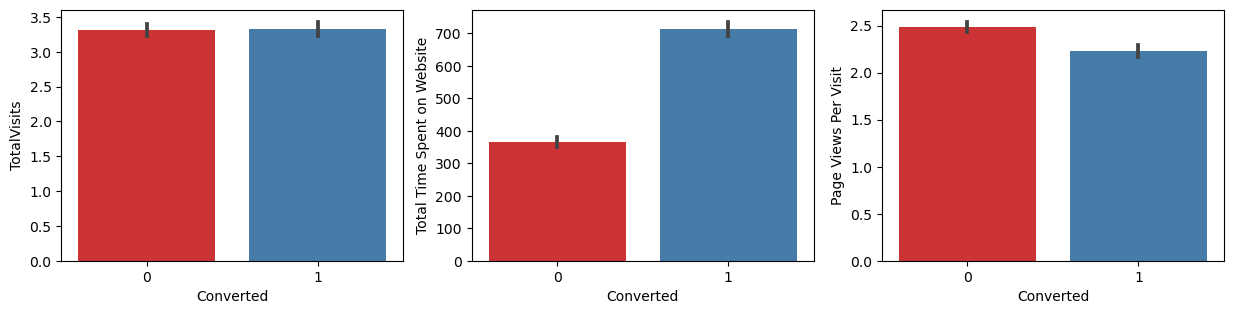

In [60]:
#Checking the conversions for all numeric values

plt.figure(figsize=(15,15))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set1', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set1', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set1', data = leads)
plt.show()

#### Observation:

The conversion rate is significantly higher for leads with higher Total Visits, Total Time Spent on Website, and Page Views Per Visit.

### Step 4: Data Preparation

<b><font color= blue size =3>4.1 Converting some binary variables (Yes/No) to 0/1</font></b>

In [61]:
# List of variables to map

varlist =  ['Do Not Email']

In [62]:
# Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [63]:
# Applying the function to the housing list

leads[varlist] = leads[varlist].apply(binary_map)

In [64]:
#Checking the heads of the dataset

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


In [65]:
#Checking the info of the dataset

leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6420 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      6420 non-null   object 
 1   Lead Source                      6420 non-null   object 
 2   Do Not Email                     6420 non-null   int64  
 3   Converted                        6420 non-null   int64  
 4   TotalVisits                      6420 non-null   float64
 5   Total Time Spent on Website      6420 non-null   int64  
 6   Page Views Per Visit             6420 non-null   float64
 7   What is your current occupation  6420 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 451.4+ KB


<b><font color= blue size =3>4.2 Dummy Variable Creation:</font></b>

In [66]:
#list of categorical columns foy creating dummy

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [67]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin']], drop_first=True)
leads = pd.concat([leads,dummy],1)

dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)


In [68]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [69]:
#checking dataset after dummy variable creation

leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0


<b><font color= black size =4>Step 5: Test-Train Split</font></b>

In [70]:
#Alotting feature variable to X

X=leads.drop('Converted', axis=1)

In [71]:
#checking head of X

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0


In [72]:
#Alotting response variable to y

y = leads['Converted']

In [73]:
#checking head of y

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [74]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

<b><font color= black size =4>Step 6: Feature Scaling</font></b>


In [75]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
6630,-0.275952,-0.490250,-0.601041,-0.213726,1,0,0,1,0,0,0,0,0,0,0,0
8176,-0.275952,-0.490250,-0.320349,-0.776181,0,0,0,0,0,0,0,1,0,0,0,0
4978,-0.275952,0.224953,1.056467,0.911186,1,0,0,0,0,1,0,0,0,0,0,0
7457,-0.275952,0.582555,-0.595712,1.473642,0,0,0,0,0,0,0,1,0,0,0,0
4383,-0.275952,0.940156,0.001205,2.036097,1,0,0,0,0,1,0,0,0,0,0,0


In [76]:
# Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

48.14641744548286

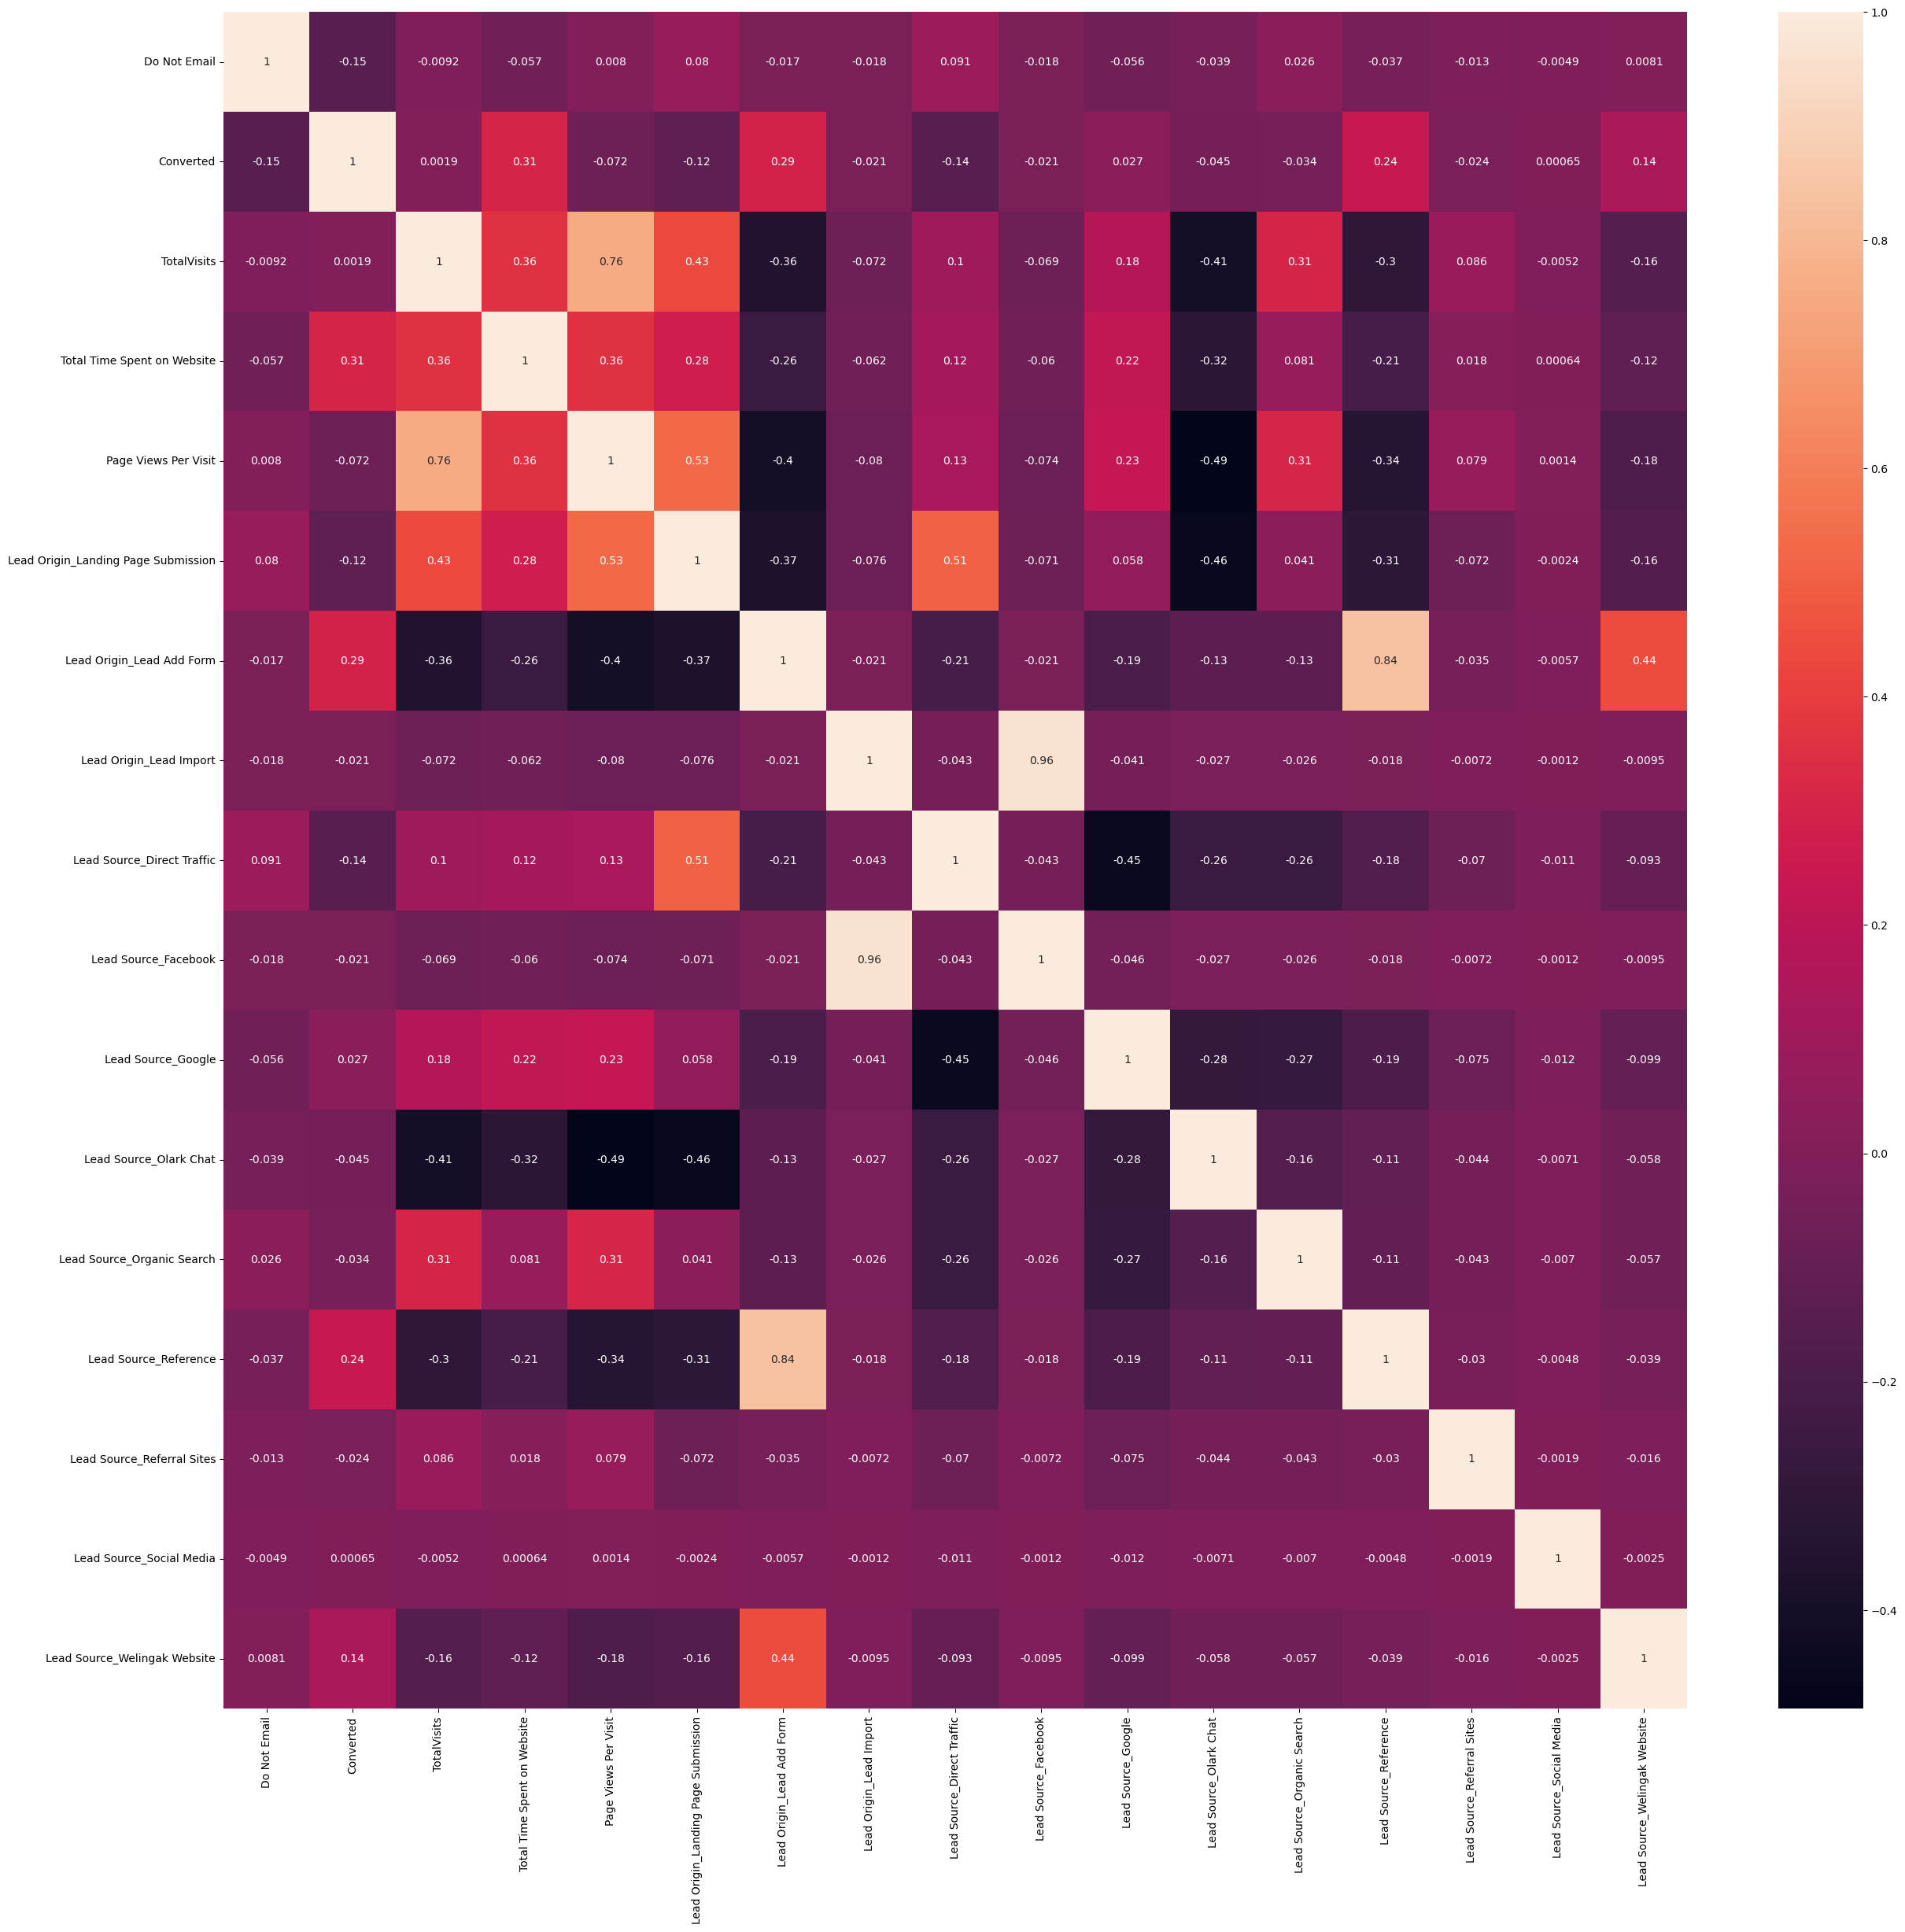

In [77]:
# Let's see the correlation matrix
plt.figure(figsize = (30,28))      
sns.heatmap(leads.corr(),annot = True)
plt.show()

<b><font color= black size =3>Dropping highly correlated dummy variables</font><b>

In [78]:
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

In [79]:
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

<b><font color= blue size =4>Step 7: Model Building using Stats Model & RFE</font></b>

In [80]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression() 
from sklearn.feature_selection import RFE 
rfe = RFE(estimator=logreg, n_features_to_select=15) # running RFE with 15 variables as output 
rfe = rfe.fit(X_train, y_train)

In [81]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [82]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_Welingak Website', True, 1)]

In [83]:
#list of RFE supported columns

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website'],
      dtype='object')

In [84]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

### Model 1

In [85]:
#BUILDING MODEL 1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4479
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2345.9
Date:                Mon, 18 Sep 2023   Deviance:                       4691.8
Time:                        01:05:39   Pearson chi2:                 4.69e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2886
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.7658      0.112      6.830      0.000       0.546       0.986
Do Not Email                    -0.3689      0.046     -8.100      0.000      -0.458      -0.280
TotalVisits                      0.2965      0.055      5.394      0.000       0.189       0.404
Total Time Spent on Website      1.1348      0.044     25.924      0.000       1.049       1.221
Page Views Per Visit            -0.1192      0.060     -1.994      0.046      -0.236      -0.002
Lead Origin_Lead Add Form        4.3142      0.777      5.551      0.000       2.791       5.837
Lead Origin_Lead Import         20.8606   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Direct Traffic      -1.6117      0.140    -11.498      0.000      -1.886      -1.337
Lead Source_Facebook           -21.1088   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Google              -1.1927      0.140     -8.539      0.000      -1.466      -0.919
Lead Source_Organic Search      -1.4324      0.171     -8.364      0.000      -1.768      -1.097
Lead Source_Reference           -1.2162      0.815     -1.492      0.136      -2.814       0.381
Lead Source_Referral Sites      -1.8085      0.349     -5.176      0.000      -2.493      -1.124
Lead Source_Social Media        18.9844   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Welingak Website     0.7405      1.273      0.581      0.561      -1.755       3.236
================================================================================================
"""

#### The p-value of the variable "What is your current occupation_Housewife" is high, indicating that it is not statistically significant in predicting the conversion rate. Therefore, it can be dropped from the analysis.


### Model 2

In [86]:
#Model 2 building

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4479
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2345.9
Date:                Mon, 18 Sep 2023   Deviance:                       4691.8
Time:                        01:05:39   Pearson chi2:                 4.69e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2886
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.7658      0.112      6.830      0.000       0.546       0.986
Do Not Email                    -0.3689      0.046     -8.100      0.000      -0.458      -0.280
TotalVisits                      0.2965      0.055      5.394      0.000       0.189       0.404
Total Time Spent on Website      1.1348      0.044     25.924      0.000       1.049       1.221
Page Views Per Visit            -0.1192      0.060     -1.994      0.046      -0.236      -0.002
Lead Origin_Lead Add Form        4.3142      0.777      5.551      0.000       2.791       5.837
Lead Origin_Lead Import         20.8606   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Direct Traffic      -1.6117      0.140    -11.498      0.000      -1.886      -1.337
Lead Source_Facebook           -21.1088   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Google              -1.1927      0.140     -8.539      0.000      -1.466      -0.919
Lead Source_Organic Search      -1.4324      0.171     -8.364      0.000      -1.768      -1.097
Lead Source_Reference           -1.2162      0.815     -1.492      0.136      -2.814       0.381
Lead Source_Referral Sites      -1.8085      0.349     -5.176      0.000      -2.493      -1.124
Lead Source_Social Media        18.9844   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Welingak Website     0.7405      1.273      0.581      0.561      -1.755       3.236
================================================================================================
"""

#### The p-value of the variable "Lead Source_Welingak Website" is high, indicating that it is not statistically significant in predicting the conversion rate. Therefore, it can be dropped from the analysis.

In [87]:
#dropping column with high p-value

col = col.drop('Lead Source_Welingak Website',1)

### Model 3

In [88]:
#Model 3 Building

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4480
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2346.1
Date:                Mon, 18 Sep 2023   Deviance:                       4692.2
Time:                        01:05:39   Pearson chi2:                 4.68e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2885
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.7724      0.112      6.919      0.000       0.554       0.991
Do Not Email                   -0.3699      0.046     -8.120      0.000      -0.459      -0.281
TotalVisits                     0.2971      0.055      5.404      0.000       0.189       0.405
Total Time Spent on Website     1.1358      0.044     25.957      0.000       1.050       1.222
Page Views Per Visit           -0.1178      0.060     -1.971      0.049      -0.235      -0.001
Lead Origin_Lead Add Form       4.6446      0.606      7.664      0.000       3.457       5.832
Lead Origin_Lead Import        20.8650   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Direct Traffic     -1.6191      0.140    -11.591      0.000      -1.893      -1.345
Lead Source_Facebook          -21.1169   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Google             -1.2020      0.139     -8.656      0.000      -1.474      -0.930
Lead Source_Organic Search     -1.4409      0.171     -8.439      0.000      -1.776      -1.106
Lead Source_Reference          -1.5494      0.649     -2.386      0.017      -2.822      -0.276
Lead Source_Referral Sites     -1.8171      0.349     -5.203      0.000      -2.502      -1.133
Lead Source_Social Media       18.9774   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
===============================================================================================
"""

#### The variable 'What is your current occupation_Businessman' has a high p-value, indicating that it is not statistically significant in predicting the outcome variable. Therefore, it can be dropped from the analysis.

In [89]:
#dropping column with high p-value

if 'What is your current occupation_Businessman' in col:
    col = col.drop('What is your current occupation_Businessman', 1)

### Model 4

In [90]:
#Building model 4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4480
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2346.1
Date:                Mon, 18 Sep 2023   Deviance:                       4692.2
Time:                        01:05:39   Pearson chi2:                 4.68e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2885
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.7724      0.112      6.919      0.000       0.554       0.991
Do Not Email                   -0.3699      0.046     -8.120      0.000      -0.459      -0.281
TotalVisits                     0.2971      0.055      5.404      0.000       0.189       0.405
Total Time Spent on Website     1.1358      0.044     25.957      0.000       1.050       1.222
Page Views Per Visit           -0.1178      0.060     -1.971      0.049      -0.235      -0.001
Lead Origin_Lead Add Form       4.6446      0.606      7.664      0.000       3.457       5.832
Lead Origin_Lead Import        20.8650   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Direct Traffic     -1.6191      0.140    -11.591      0.000      -1.893      -1.345
Lead Source_Facebook          -21.1169   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Google             -1.2020      0.139     -8.656      0.000      -1.474      -0.930
Lead Source_Organic Search     -1.4409      0.171     -8.439      0.000      -1.776      -1.106
Lead Source_Reference          -1.5494      0.649     -2.386      0.017      -2.822      -0.276
Lead Source_Referral Sites     -1.8171      0.349     -5.203      0.000      -2.502      -1.133
Lead Source_Social Media       18.9774   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
===============================================================================================
"""

In [91]:
#Dropping column with high p-value

if isinstance(col, pd.DataFrame) and 'What is your current occupation_Other' in col.columns:
    col = col.drop('What is your current occupation_Other', 1)

### Model 5

In [92]:
#Building model 5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4480
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2346.1
Date:                Mon, 18 Sep 2023   Deviance:                       4692.2
Time:                        01:05:39   Pearson chi2:                 4.68e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2885
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.7724      0.112      6.919      0.000       0.554       0.991
Do Not Email                   -0.3699      0.046     -8.120      0.000      -0.459      -0.281
TotalVisits                     0.2971      0.055      5.404      0.000       0.189       0.405
Total Time Spent on Website     1.1358      0.044     25.957      0.000       1.050       1.222
Page Views Per Visit           -0.1178      0.060     -1.971      0.049      -0.235      -0.001
Lead Origin_Lead Add Form       4.6446      0.606      7.664      0.000       3.457       5.832
Lead Origin_Lead Import        20.8650   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Direct Traffic     -1.6191      0.140    -11.591      0.000      -1.893      -1.345
Lead Source_Facebook          -21.1169   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Google             -1.2020      0.139     -8.656      0.000      -1.474      -0.930
Lead Source_Organic Search     -1.4409      0.171     -8.439      0.000      -1.776      -1.106
Lead Source_Reference          -1.5494      0.649     -2.386      0.017      -2.822      -0.276
Lead Source_Referral Sites     -1.8171      0.349     -5.203      0.000      -2.502      -1.133
Lead Source_Social Media       18.9774   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
===============================================================================================
"""

#### Since Model 5 has shown stable results with significant p-values for the variables, we will proceed with this model for further analysis.

### Calculating VIF

In [93]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Import,18.02
7,Lead Source_Facebook,18.01
4,Lead Origin_Lead Add Form,3.82
10,Lead Source_Reference,3.56
3,Page Views Per Visit,2.55
1,TotalVisits,2.40
2,Total Time Spent on Website,1.21
9,Lead Source_Organic Search,1.15
8,Lead Source_Google,1.07
6,Lead Source_Direct Traffic,1.03


#### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only.

## Predicting a Train model

In [94]:
# Getting the Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6630    0.175405
8176    0.271981
4978    0.696754
7457    0.223818
4383    0.428819
4152    0.403205
406     0.838840
8992    0.265097
1504    0.199933
66      0.601324
dtype: float64

In [95]:
y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred[:10]

array([0.17540504, 0.27198113, 0.69675429, 0.22381766, 0.42881884,
       0.40320486, 0.83884005, 0.2650967 , 0.19993252, 0.60132396])

In [96]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.175405,6630
1,0,0.271981,8176
2,0,0.696754,4978
3,0,0.223818,7457
4,0,0.428819,4383


In [97]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.175405,6630,0
1,0,0.271981,8176,0
2,0,0.696754,4978,1
3,0,0.223818,7457,0
4,0,0.428819,4383,0


### Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [98]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1971  370]
 [ 716 1437]]


In [99]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7583444592790387


In [100]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [101]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.667440780306549

In [102]:
# Let us calculate specificity

TN / float(TN+FP)

0.841947885519009

In [103]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert

print(FP/ float(TN+FP))

0.15805211448099102


In [104]:
# positive predictive value 

print (TP / float(TP+FP))

0.7952407304925291


In [105]:
# Negative predictive value

print (TN / float(TN+ FN))

0.7335318198734648


## PLOTTING ROC CURVE

#### An ROC curve demonstrates several things:

1)It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2)The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [106]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [107]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


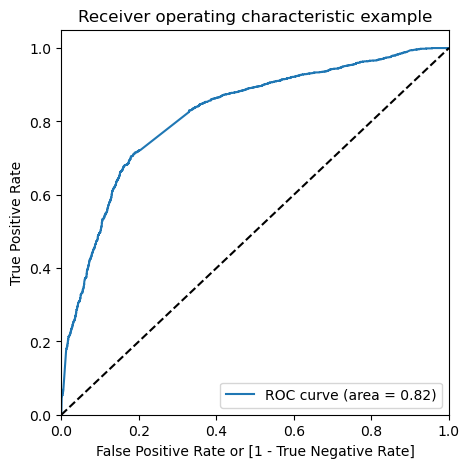

In [108]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### The ROC curve value of 0.86 indicates that our predictive model is performing well, as it is close to 1. This suggests that the model has a high level of accuracy in distinguishing between the positive and negative classes.

### <font color = black>Finding Optimal Cutoff Point

#### The optimal cutoff probability is the probability threshold at which we achieve a balanced sensitivity and specificity in our model.

In [109]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.175405,6630,0,1,1,0,0,0,0,0,0,0,0
1,0,0.271981,8176,0,1,1,1,0,0,0,0,0,0,0
2,0,0.696754,4978,1,1,1,1,1,1,1,1,0,0,0
3,0,0.223818,7457,0,1,1,1,0,0,0,0,0,0,0
4,0,0.428819,4383,0,1,1,1,1,1,0,0,0,0,0


In [110]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.479083  1.000000  0.000000
0.1   0.1  0.516466  0.998142  0.073473
0.2   0.2  0.594126  0.951231  0.265698
0.3   0.3  0.713173  0.877845  0.561726
0.4   0.4  0.745661  0.826753  0.671081
0.5   0.5  0.758344  0.667441  0.841948
0.6   0.6  0.736093  0.587552  0.872704
0.7   0.7  0.700490  0.474686  0.908159
0.8   0.8  0.651980  0.330237  0.947886
0.9   0.9  0.608812  0.202044  0.982913


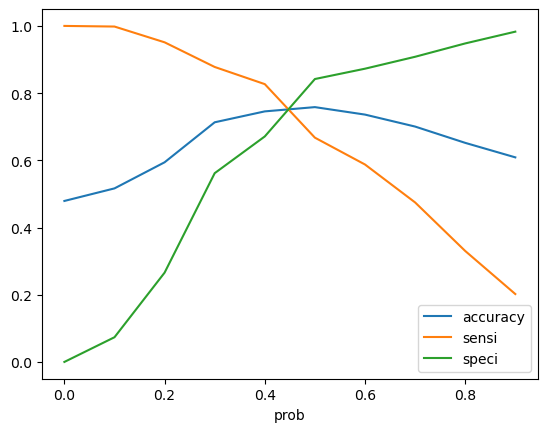

In [111]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Based on the curve, a cutoff probability of 0.3 is considered optimal as it allows for a balance between sensitivity and specificity in our predictive model.

In [112]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.175405,6630,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.271981,8176,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.696754,4978,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.223818,7457,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.428819,4383,0,1,1,1,1,1,0,0,0,0,0,1


In [113]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.175405,6630,0,18
1,0,0.271981,8176,0,27
2,0,0.696754,4978,1,70
3,0,0.223818,7457,0,22
4,0,0.428819,4383,1,43


In [114]:
# checking wether 80% cases are correctly predicted based on the converted column.


checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1890
0     263
Name: final_Predicted, dtype: int64

In [115]:
# check the precentage of final_predicted conversions

2005/float(2005+414)

0.8288548987184787

### Based on the CEO's requirement of achieving an 83% conversion rate, we can conclude that the final prediction of conversions using this model is satisfactory, indicating that it is a good model.

In [116]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7131731197151758

In [117]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[1315, 1026],
       [ 263, 1890]], dtype=int64)

In [118]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [119]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8778448676265675

In [120]:
# Let us calculate specificity

TN / float(TN+FP)

0.5617257582229817

### Observation:

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:

1)Accuracy : 71.31%

2)Sensitivity :87.78%

3)Specificity : 56.17%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [121]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert

print(FP/ float(TN+FP))

0.43827424177701835


In [122]:
# Positive predictive value 

print (TP / float(TP+FP))

0.6481481481481481


In [123]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8333333333333334


### Precision and Recall

In [124]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[1315, 1026],
       [ 263, 1890]], dtype=int64)

In [125]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6481481481481481

In [126]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8778448676265675

In [127]:
from sklearn.metrics import precision_score, recall_score

In [128]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6481481481481481

In [129]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8778448676265675

### Precision and Recall Trade-off

In [130]:
# importing precision recall curve from sklearn library

from sklearn.metrics import precision_recall_curve

In [131]:
# Creating precision recall curve

y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

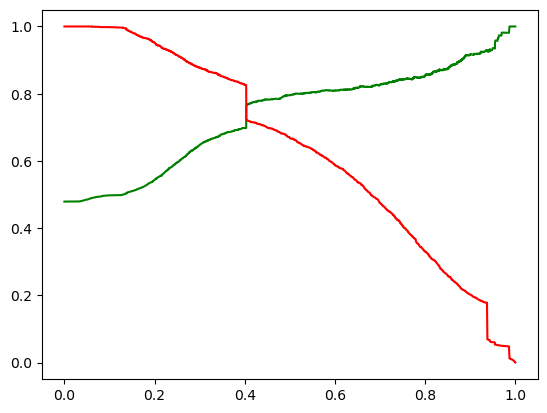

In [132]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Predictions on the test set

In [133]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
4051,-0.275640,0.294040,1.723473,-0.175940,0,0,0,0,1,0,0,0,0,0
1696,3.627915,-0.070388,0.457307,0.385115,0,0,1,0,0,0,0,0,0,0
1325,-0.275640,2.116181,1.168538,2.068277,0,0,0,0,0,1,0,0,0,0
7991,-0.275640,-0.070388,2.071186,-0.456467,0,0,0,0,1,0,0,0,0,0
8177,-0.275640,-0.070388,0.854191,0.385115,0,0,0,0,1,0,0,0,0,0


In [134]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media
4051,-0.275640,0.294040,1.723473,-0.175940,0,0,0,0,1,0,0,0,0
1696,3.627915,-0.070388,0.457307,0.385115,0,0,1,0,0,0,0,0,0
1325,-0.275640,2.116181,1.168538,2.068277,0,0,0,0,0,1,0,0,0
7991,-0.275640,-0.070388,2.071186,-0.456467,0,0,0,0,1,0,0,0,0
8177,-0.275640,-0.070388,0.854191,0.385115,0,0,0,0,1,0,0,0,0


In [135]:
X_test_sm = sm.add_constant(X_test)

In [136]:
X_test_sm.shape

(1926, 14)

In [137]:
y_test_pred = res.predict(X_test_sm)    

In [138]:
y_test_pred[:10]

4051    0.850421
1696    0.149884
1325    0.758741
7991    0.886714
8177    0.640199
404     0.774721
6682    0.148583
5575    0.936695
5930    0.399790
8723    0.213734
dtype: float64

In [139]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [140]:
# Let's see the head

y_pred_1.head()

,0
4051,0.850421
1696,0.149884
1325,0.758741
7991,0.886714
8177,0.640199


In [141]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [142]:
# Putting CustID to index

y_test_df['Prospect ID'] = y_test_df.index

In [143]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [144]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [145]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,4051,0.850421
1,1,1696,0.149884
2,0,1325,0.758741
3,0,7991,0.886714
4,1,8177,0.640199


In [146]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})


In [147]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,4051,0.850421
1,1,1696,0.149884
2,0,1325,0.758741
3,0,7991,0.886714
4,1,8177,0.640199


In [148]:
#Rearranging the columns
    
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [149]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4051,0,0.850421,85
1,1696,1,0.149884,15
2,1325,0,0.758741,76
3,7991,0,0.886714,89
4,8177,1,0.640199,64


In [150]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [151]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4051,0,0.850421,85,1
1,1696,1,0.149884,15,0
2,1325,0,0.758741,76,1
3,7991,0,0.886714,89,1
4,8177,1,0.640199,64,1


In [152]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    833
0    105
Name: final_Predicted, dtype: int64

In [153]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

### The final prediction of conversions, with a target rate of 83%, aligns with the predictions made on the training dataset, indicating a successful model.

In [154]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.6936656282450675

In [155]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )

confusion2

array([[503, 485],
       [105, 833]], dtype=int64)

In [156]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [157]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8880597014925373

In [158]:
# Let us calculate specificity

TN / float(TN+FP)

0.5091093117408907

### Precision and Recall metrics for the test set

In [159]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6320182094081942

In [160]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8880597014925373

### Observation:

After running the model on the Test Data these are the figures we obtain:

1)Accuracy : 69.36%

2)Sensitivity :88.80%

3)Specificity : 50.91%

# Conclusion and Observations:

1. The model's final prediction of conversions was determined by considering both sensitivity-specificity and precision-recall metrics, with the optimal cutoff being based on sensitivity and specificity.

2. The accuracy, sensitivity, and specificity values of the test set closely resemble those calculated using the trained set, indicating consistent performance.

3. The lead score calculated on the trained set suggests an approximate conversion rate of 80% for the final predicted model.

4. Taking all these factors into account, the overall conclusion is that this model performs well and can be considered as good.

## Important features that contribute significantly to a good conversion rate

1. The analysis reveals that certain features significantly contribute to the probability of lead conversion. The most important features found are Lead Origin_Lead Add Form and What is your current occupation_Working Professional.

2. These features have a strong positive impact on the conversion rate, indicating that leads originating from the lead add form and those who are working professionals are more likely to convert.

3. Additionally, the total time spent on the website is also identified as a significant factor, suggesting that higher engagement on the website positively influences the probability of lead conversion.